# Predicting Survival in the Titanic Data Set 
# We will be using a decision tree to make predictions about the Titanic data  set from Kaggle. This data set provides information on the Titanic  passengers and can be used to predict whether a passenger survived or  not. 


In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report 

In [2]:
import seaborn as sns

In [11]:
titanic = pd.read_csv("train.csv")

In [12]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch  (Parents/children aboard), and Fare to predict whether a passenger  survived. 

In [20]:
X = titanic.drop(columns=['PassengerId', 'Survived','Name','Ticket','Cabin', 'Embarked'])

In [21]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [22]:
y=titanic['Survived']

In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
sex = {'female':0,'male':1}

In [33]:
X["Sex"]= X["Sex"].map(sex)

In [34]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [36]:
X["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [38]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [40]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [48]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
X["Age"].fillna(X['Age'].mean(),inplace=True)

In [54]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 355)

In [58]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
clf.score(x_train,y_train)

0.9865269461077845

In [60]:
clf.score(x_test,y_test)

0.7174887892376681

In [61]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [62]:
class_name

[1, 0]

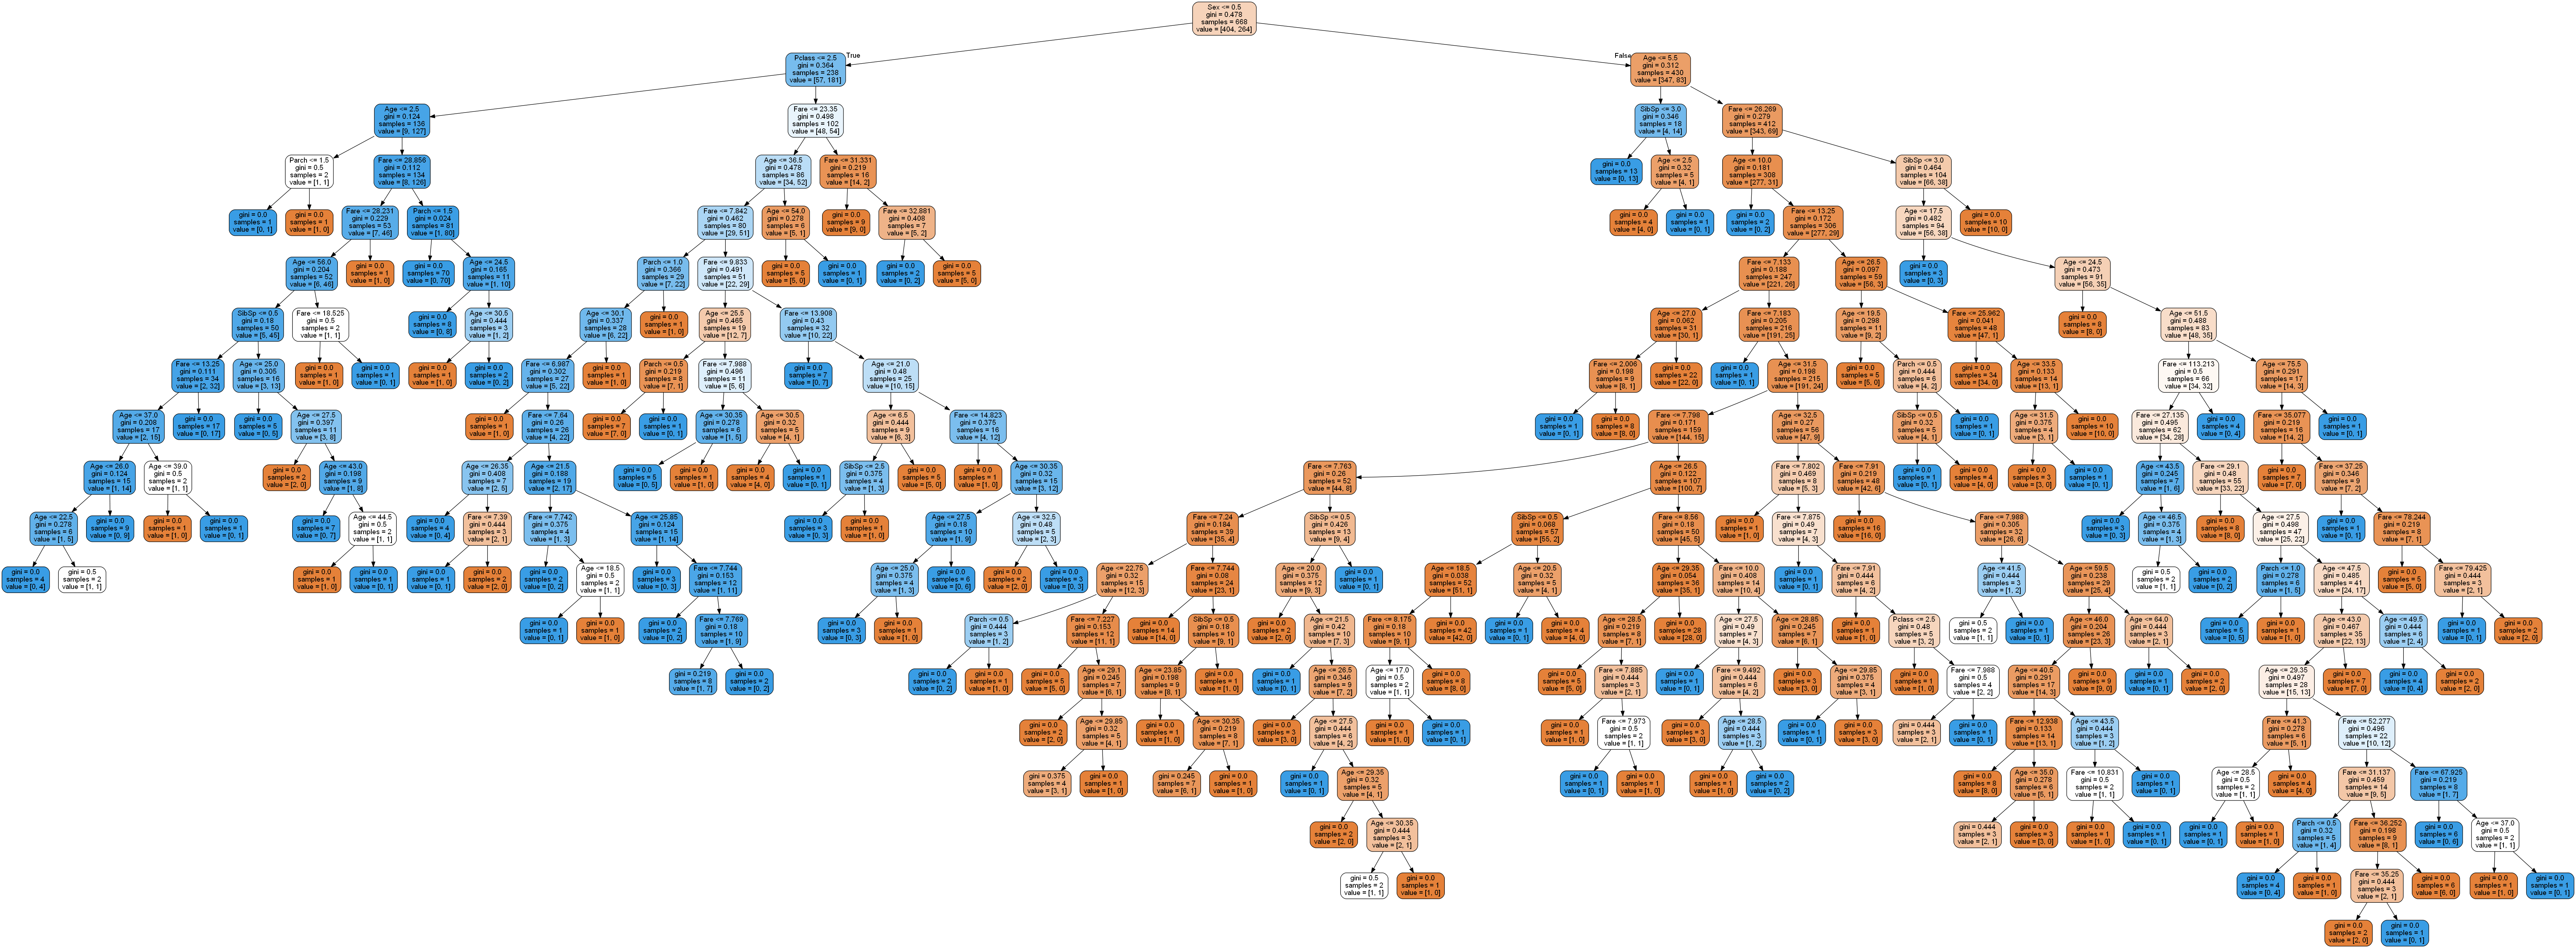

In [64]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("Dectree.png")
# Show graph
Image(graph.create_png())

In [65]:
clf.score(x_test,y_test)

0.7174887892376681

In [67]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [68]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [69]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [70]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


In [71]:
grid_search.best_score_

0.8322747166423522

In [72]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 2, min_samples_split= 5, splitter= 'random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                       splitter='random')

In [73]:
clf.score(x_train,y_train)

0.844311377245509

In [74]:
clf.score(x_test,y_test)

0.7757847533632287

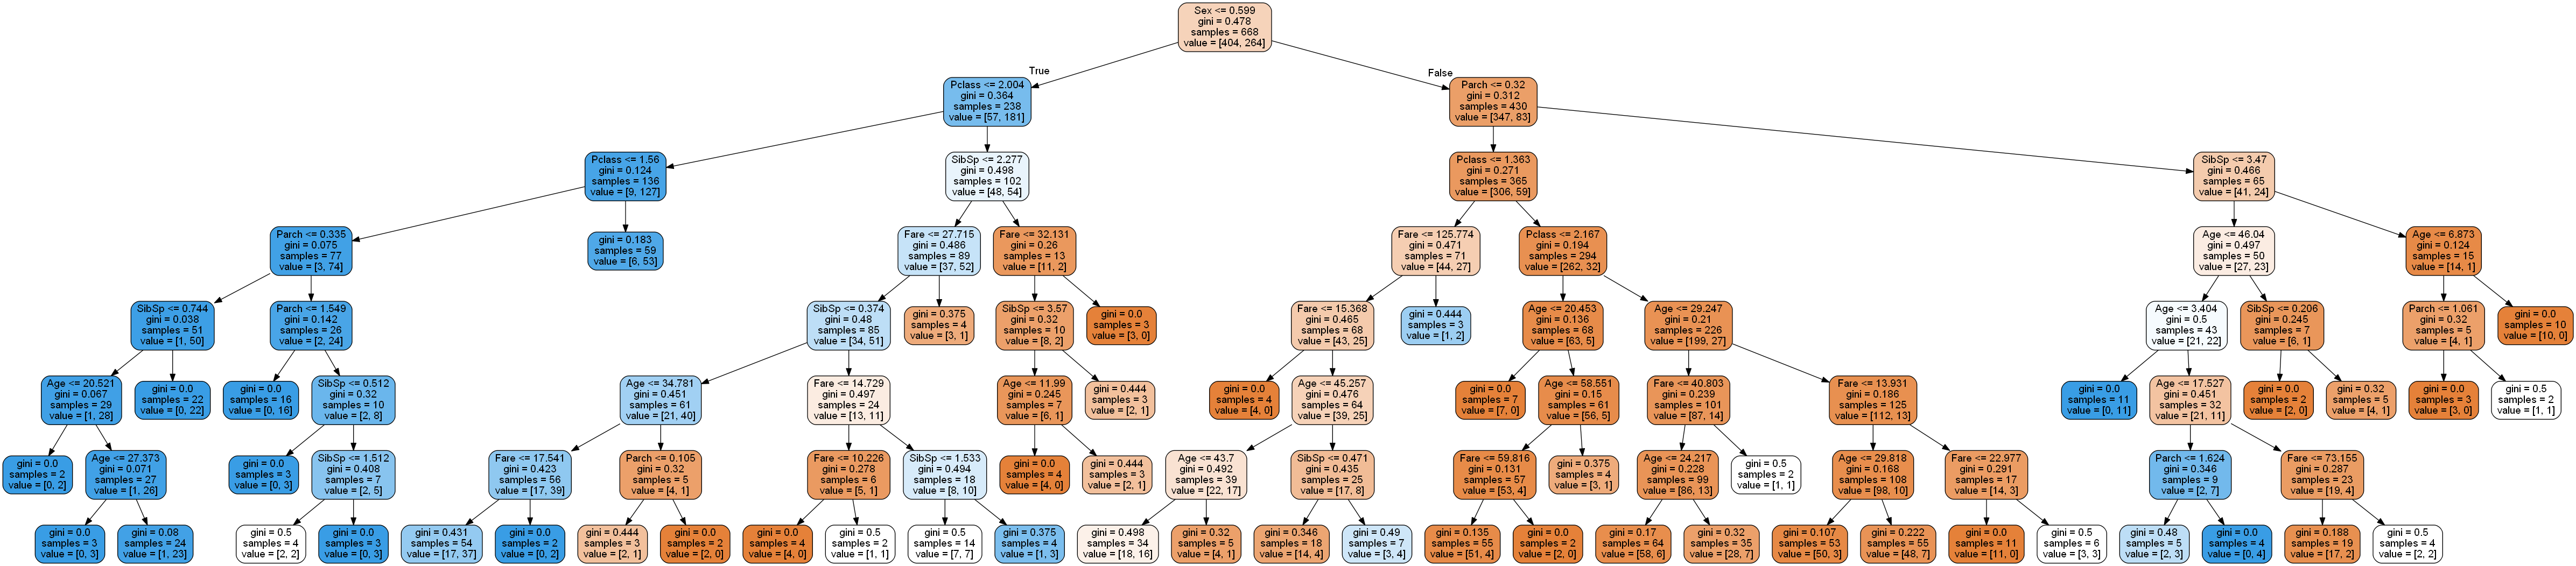

In [76]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names=feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [77]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [78]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [94]:
a=(np.asarray([3,1,22.000000,1,0,7.2500]))
clf.predict(a.reshape(1,-1))

array([0], dtype=int64)

In [96]:
a=(np.asarray([1,0,38.000000,1,0,71.2833]))
clf.predict(a.reshape(1,-1))

array([1], dtype=int64)

In [107]:
b=list(y_pred)
b.count(0)

161

In [108]:
b.count(1)

62

In [111]:
y_pred.size

223

In [113]:
survived= b.count(1)/y_pred.size
survived

0.27802690582959644

In [116]:
m=clf.predict(X)

In [118]:
(list(m)).count(0)

607

In [119]:
(list(m)).count(1)

284

In [122]:
m.size

891

In [124]:
survived1= (list(m)).count(1)/m.size
survived1

0.31874298540965207